Gaussian mixture models (GMMs) are based on the assumption that each data point come from one of K different Gaussian distributions with unkown parameters (mean and covariance). GMMs are generative models that try to learn the parameters and figure out the true data distribution. We assume that we know the value of K. To learn the parameters, GMMs use the expectation maximization (EM) algorithm to optimize the maximum likelihood. In the process, GMM uses Bayes Theorem to calculate the probability of a given observation $x_i$ to belong to each clusters k (k = 1,2,...,K). For a nice and introductory tutotial on GMMs and EM algorithm watch <a href="https://www.youtube.com/watch?v=REypj2sy_5U&list=PLBv09BD7ez_4e9LtmK626Evn1ion6ynrt&index=1"><div>these</div></a> series of 5 short videos on youtube.


### Simple example

Assume that the data points are 1 dimensional and we have 3 clusters of Gaussian distributions, so K = 3. To build a toy data set, we will start by sampling points from K different Gaussian distributions. Note that each cluster $c_k$ for $k \in \{1,2,3\}$ has a univariate Gaussian distribution:

$$c_k \sim N(\mu_{k},\sigma_{k}^2)$$

Now let's create a synthetic data set with known parameters $\mu_{1}, \mu_{2}, \mu_{3}, \sigma_{1}^2, \sigma_{2}^2, \sigma_{3}^2$. From each Gaussian distribution we will create 100 data points, so in total we have 300 data points.

In [2]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal

In [7]:
n_samples = 100 #number of samples for each Gaussian distribution
mu1, sigma1 = -4, 1.2 #known mean and variance of first cluster
mu2, sigma2 = 4, 1.8 #known mean and variance of second cluster
mu3, sigma3 = 0, 1.6 #known mean and variance of third cluster

x1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples) #create random data set for first cluster
x2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples) #create random data set for second cluster
x3 = np.random.normal(mu3, np.sqrt(sigma3), n_samples) #create random data set for third cluster


X = np.array(list(x1) + list(x2) + list(x3)) #combine the three data sets together. Now X is our data set
np.random.shuffle(X) #shuffle the order of data points

Below you can see the resulting synthesized data X.

[]

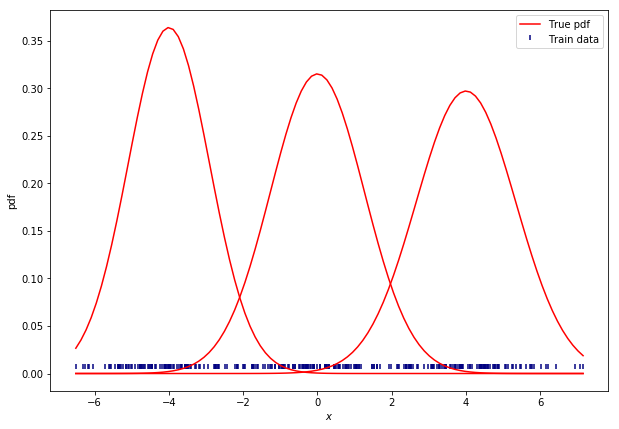

In [15]:
def pdf(data, mean: float, variance: float):
  # A normal continuous random variable.
  s1 = 1/(np.sqrt(2*np.pi*variance))
  s2 = np.exp(-(np.square(data - mean)/(2*variance)))
  return s1 * s2

bins = np.linspace(np.min(X),np.max(X),100)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

plt.plot(bins, pdf(bins, mu1, sigma1), color='red', label="True pdf")
plt.plot(bins, pdf(bins, mu2, sigma2), color='red')
plt.plot(bins, pdf(bins, mu3, sigma3), color='red')

plt.legend()
plt.plot()

Now that we have our data set X of the mixture of 3 Gaussian distributions, we are going to use this data to learn the parameters of the 3 clusters (assuming that we don't know them) using GMMs. The number of clusters K defines the number of Gaussians we want to fit. We will assume that we know that K = 3 and then GMMs will try to learn 3 Gaussian distributions from data. 

Before we start running EM, we need to give initial values for the learnable parameters. We can guess random values for the means and variances, and initialize the weight parameters as 1/k. The steps of the EM algorithm are as follows:
1. Initialize the paramters $\mu_{k}, \sigma_{k}^2$ and the priors, $\Phi_k = P(\text{a data point belongs to cluster k}) = \frac{1}{3}$, k = 1,2,3


2. (E step) For each observation $x_i$, calculate the likelihood of each observation $x_i$ using the estimated parameters:

$$P(x_i | \text{x_i belongs to cluster k}) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} exp(-\frac{(x_i - \mu_k)^2}{2\sigma_k^2}), k = 1,2,3$$

then calculate the likelihood of a given example $x_i$ belongs to the cluster k: 

$$b_k = P(x_i\text{belongs to cluster k} | x_i) = \frac{P(x_i | x_i \text{belongs to cluster k})P(x_i\text{belongs to cluster k})}{\sum_{k=1}^{3}P(x_i | x_i \text{belongs to cluster k})P(x_i \text{belongs to cluster k})} = \frac{P(x_i | x_i \text{belongs to cluster k})\Phi_k}{\sum_{k=1}^{3}P(x_i | x_i \text{belongs to cluster k})\Phi_k}$$

3. (M step) update the parameters and priors as follows:

$$\mu_k = \frac{\sum_{k=1}^{3}b_k x}{\sum_{k=1}^{3}b_k}, \sigma_k^{2} = \frac{\sum_{k=1}^{3}b_k (x - \mu_k)^2}{\sum_{k=1}^{3}b_k}, \Phi_k = \frac{1}{N}\sum_{k=1}^{3}b_k$$

We will repeat step 2,3 until convergence. This is up to a point where the difference between parameter's update values are smaller than a given threshold (epsilon). Here is the code for step 1,2 and 3.

In [16]:
# Step 1. set K, initial values for parameters and priors (weights)
k = 3
weights = np.ones((k)) / k
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(means, variances)

[-6.24933809 -0.37846807  4.86300024] [0.72629181 0.62386107 0.0722629 ]


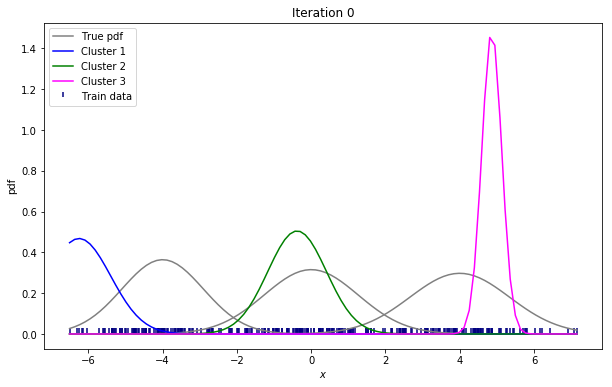

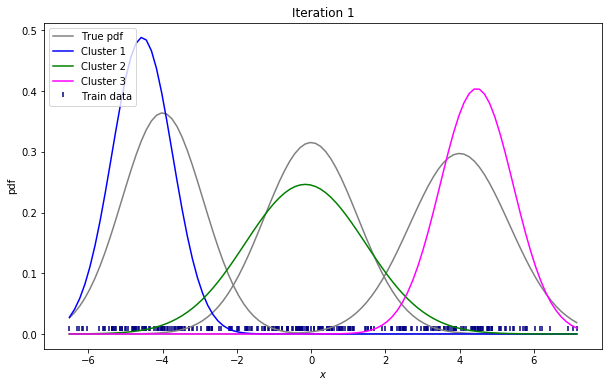

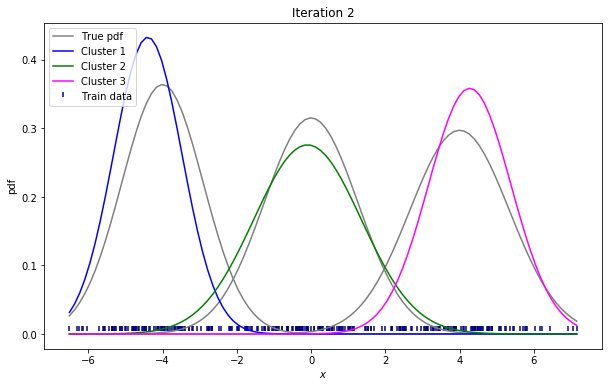

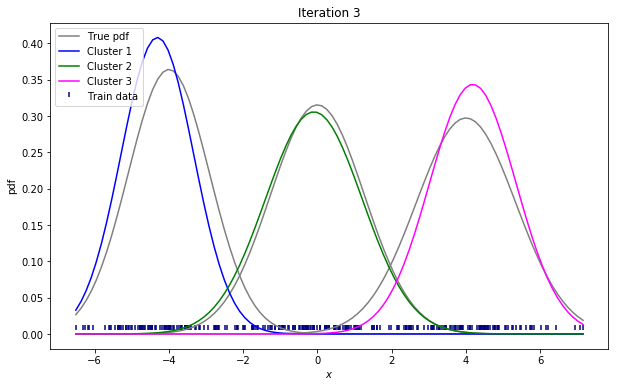

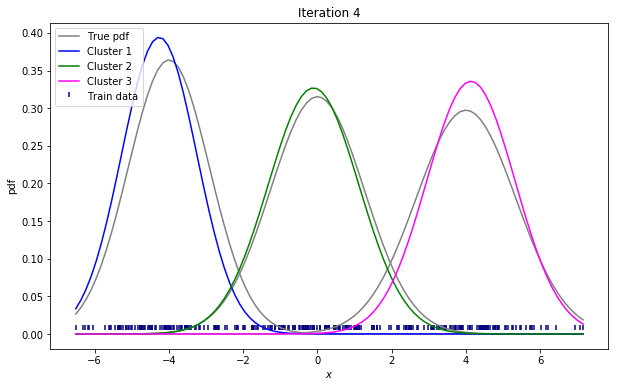

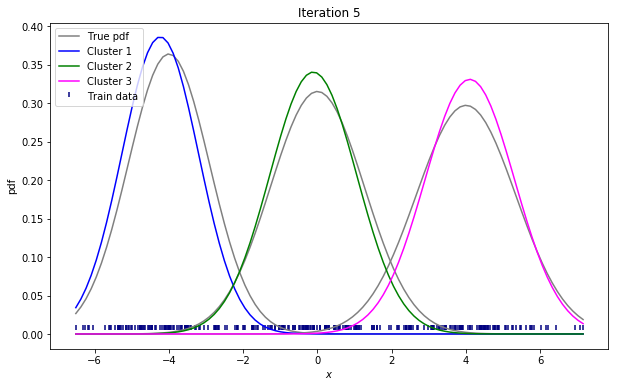

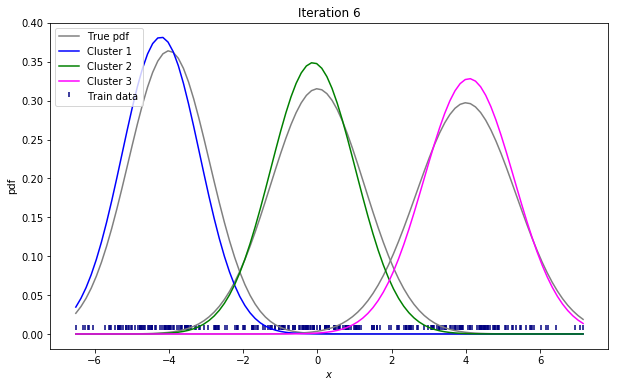

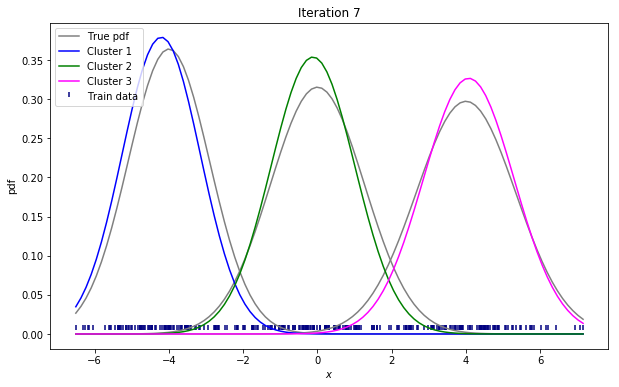

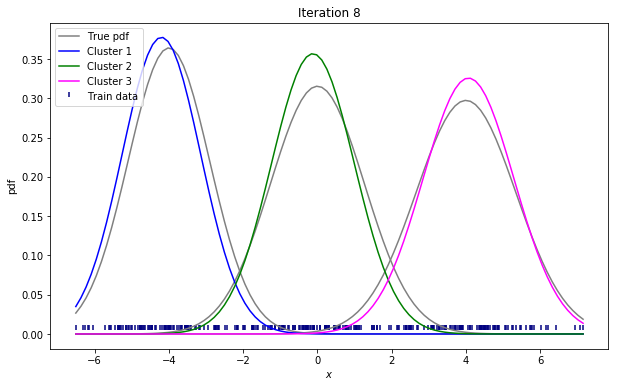

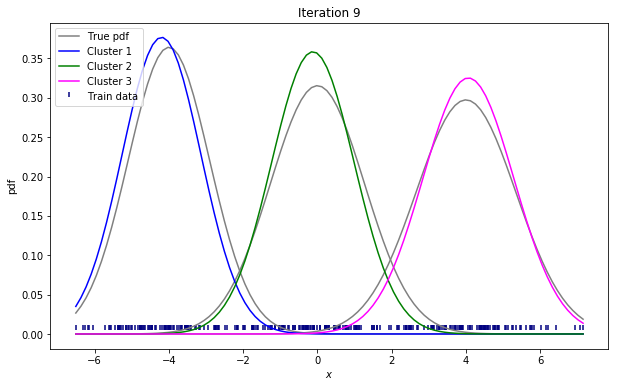

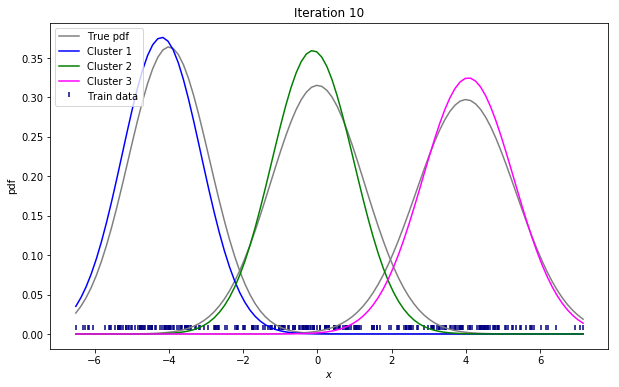

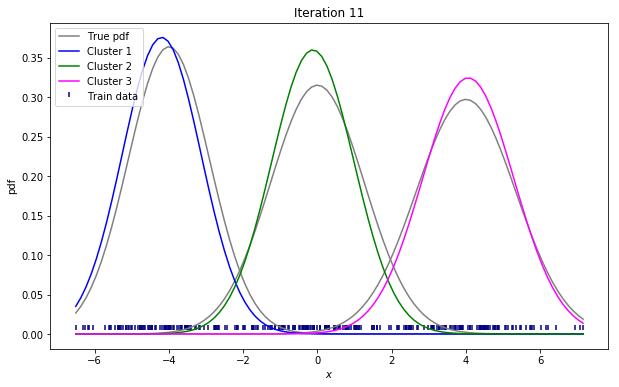

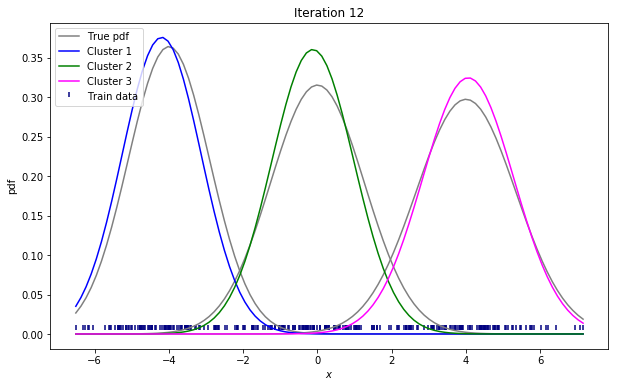

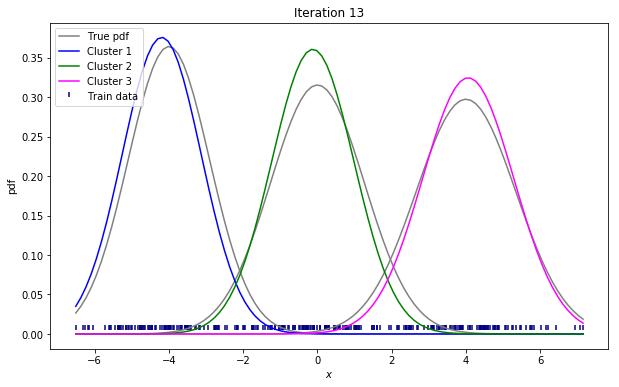

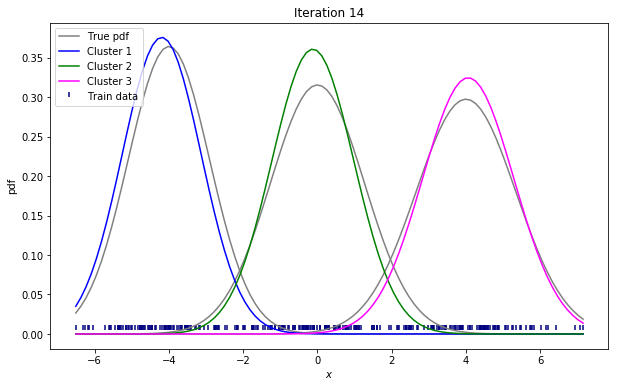

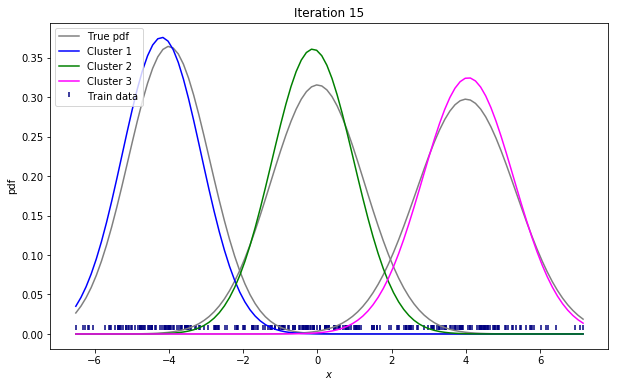

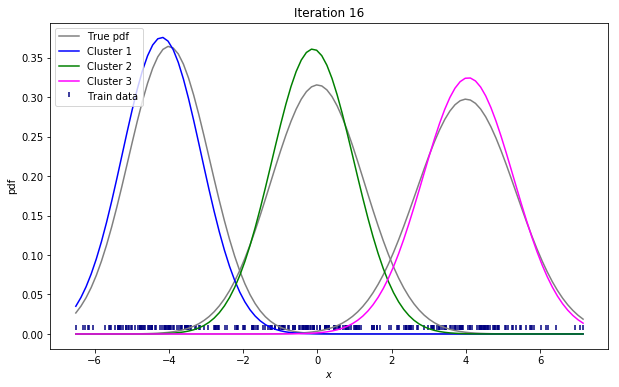

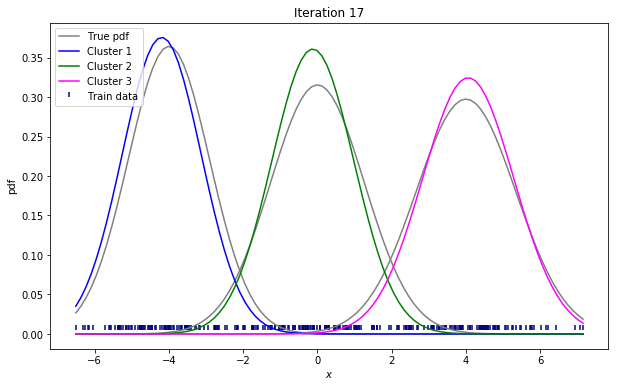

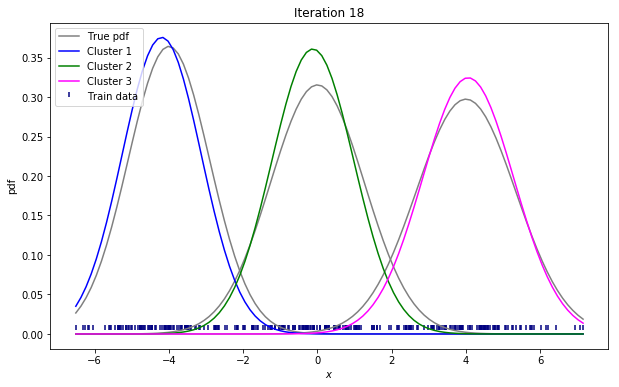

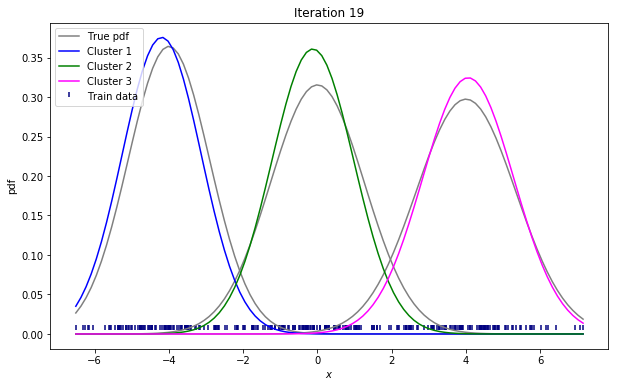

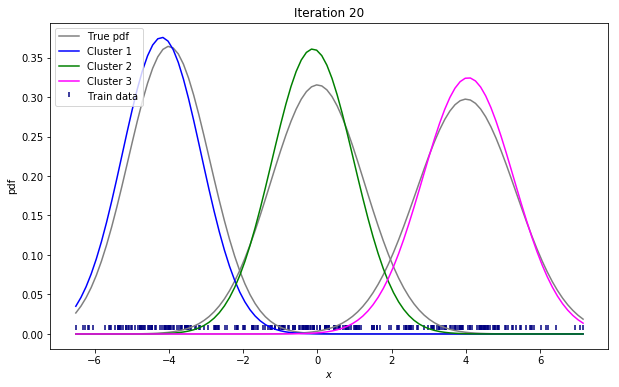

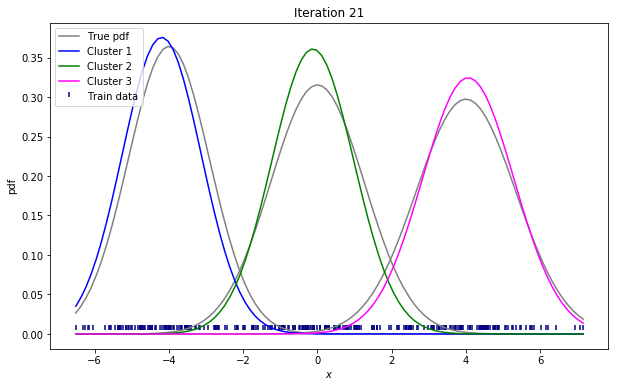

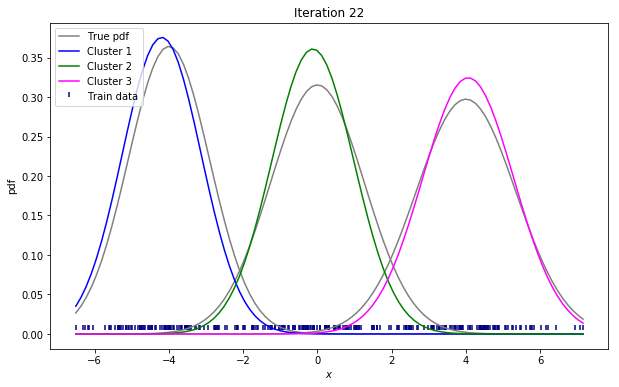

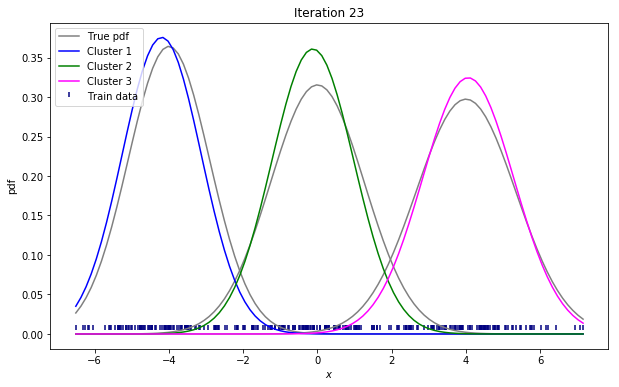

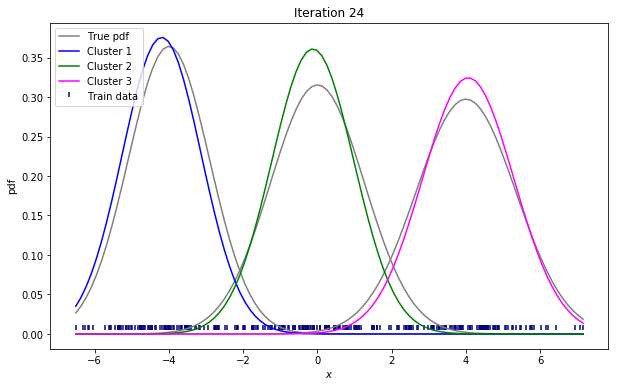

In [17]:
# Step 2 and 3: E and M step
eps=1e-8
for step in range(25):
  
  if step % 1 == 0:
    plt.figure(figsize=(10,6))
    axes = plt.gca()
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.title("Iteration {}".format(step))
    plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

    plt.plot(bins, pdf(bins, mu1, sigma1), color='grey', label="True pdf")
    plt.plot(bins, pdf(bins, mu2, sigma2), color='grey')
    plt.plot(bins, pdf(bins, mu3, sigma3), color='grey')

    plt.plot(bins, pdf(bins, means[0], variances[0]), color='blue', label="Cluster 1")
    plt.plot(bins, pdf(bins, means[1], variances[1]), color='green', label="Cluster 2")
    plt.plot(bins, pdf(bins, means[2], variances[2]), color='magenta', label="Cluster 3")
    
    plt.legend(loc='upper left')
    
    plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
  
  # calculate the maximum likelihood of each observation xi
  likelihood = []
  

  # Expectation step
  for j in range(k):
    likelihood.append(pdf(X, means[j], np.sqrt(variances[j])))
  likelihood = np.array(likelihood)
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian    
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))
  
    # updage mean and variance
    means[j] = np.sum(b[j] * X) / (np.sum(b[j]+eps))
    variances[j] = np.sum(b[j] * np.square(X - means[j])) / (np.sum(b[j]+eps))
    
    # update the weights
    weights[j] = np.mean(b[j])